In [1]:
# !pip install tensorflow
import tensorflow as tf
from tensorflow.keras import models, layers
# !pip install matplotlib
import matplotlib.pyplot as plt


In [7]:
!pip install --upgrade pip


                                              0.0/2.1 MB ? eta -:--:--
     -                                        0.1/2.1 MB 2.3 MB/s eta 0:00:01
     ----                                     0.2/2.1 MB 3.0 MB/s eta 0:00:01
     -------                                  0.4/2.1 MB 2.9 MB/s eta 0:00:01
     ---------                                0.5/2.1 MB 3.0 MB/s eta 0:00:01
     --------------                           0.8/2.1 MB 3.2 MB/s eta 0:00:01
     --------------                           0.8/2.1 MB 3.2 MB/s eta 0:00:01
     --------------------                     1.1/2.1 MB 3.2 MB/s eta 0:00:01
     ------------------------                 1.3/2.1 MB 3.5 MB/s eta 0:00:01
     ------------------------                 1.3/2.1 MB 3.0 MB/s eta 0:00:01
     -----------------------------            1.5/2.1 MB 3.5 MB/s eta 0:00:01
     -------------------------------          1.6/2.1 MB 3.2 MB/s eta 0:00:01
     -------------------------------          1.7/2.1 MB 3.2 MB/s eta 0

ERROR: To modify pip, please run the following command:
C:\Users\Anuj\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 5
CHANNELS = 3
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [3]:
class_name = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [4]:
len(dataset)

68

In [5]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
print(image_batch[1].shape)

(32, 256, 256, 3)
[1 0 0 0 1 2 2 1 0 0 0 0 1 0 1 0 1 1 2 0 1 1 1 0 0 0 0 1 0 1 0 0]
(256, 256, 3)


In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])
    print(image_batch[0].shape)    
# print(image_batch)

tf.Tensor(
[[[167. 169. 181.]
  [189. 191. 203.]
  [170. 172. 184.]
  ...
  [126. 122. 137.]
  [128. 124. 139.]
  [107. 103. 118.]]

 [[197. 199. 211.]
  [172. 174. 186.]
  [177. 179. 191.]
  ...
  [ 93.  89. 104.]
  [103.  99. 114.]
  [153. 149. 164.]]

 [[203. 205. 217.]
  [162. 164. 176.]
  [171. 173. 185.]
  ...
  [159. 155. 170.]
  [134. 130. 145.]
  [145. 141. 156.]]

 ...

 [[210. 208. 222.]
  [236. 234. 248.]
  [228. 226. 240.]
  ...
  [109. 105. 119.]
  [125. 121. 135.]
  [ 84.  80.  94.]]

 [[171. 169. 183.]
  [167. 165. 179.]
  [172. 170. 184.]
  ...
  [126. 122. 136.]
  [137. 133. 147.]
  [157. 153. 167.]]

 [[175. 173. 187.]
  [181. 179. 193.]
  [142. 140. 154.]
  ...
  [128. 124. 138.]
  [147. 143. 157.]
  [134. 130. 144.]]], shape=(256, 256, 3), dtype=float32)
(256, 256, 3)


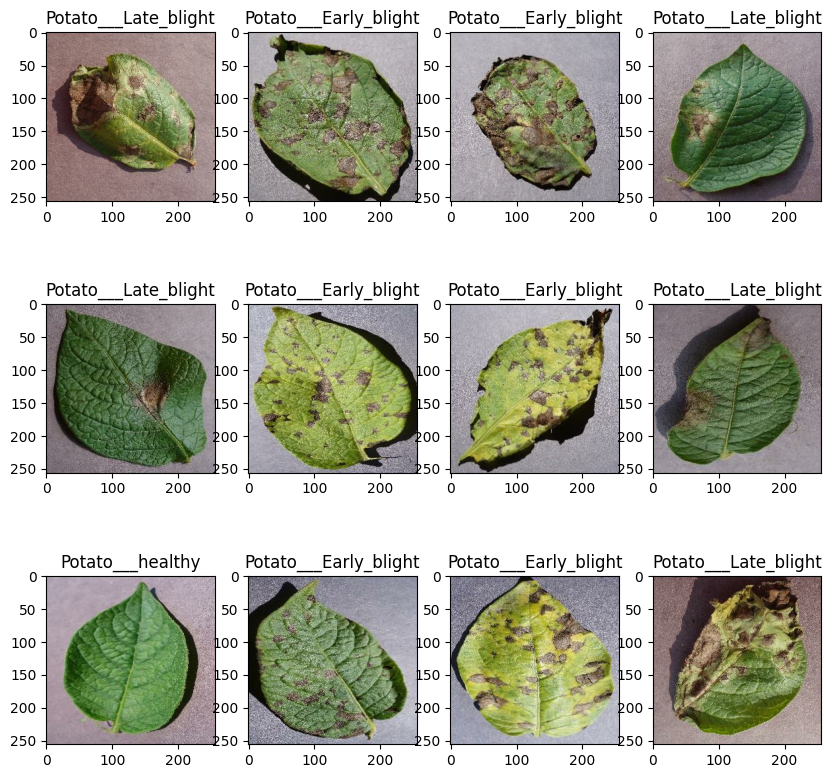

In [7]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
    #     plt.axis("off")

In [8]:
for image_batch,label_batch in dataset.take(1):
    print((label_batch))
    print(image_batch[4])
#     for i in range(12):
#         ax= plt.subplot(3,4,i+1)
#         plt.imshow(image_batch[i].numpy().astype("uint8"))
#         plt.title(class_name[label_batch[i]])

tf.Tensor([1 0 1 1 0 1 1 1 0 1 2 0 0 1 1 2 0 0 0 2 0 0 1 1 2 1 1 1 0 0 1 1], shape=(32,), dtype=int32)
tf.Tensor(
[[[162. 164. 177.]
  [195. 197. 210.]
  [172. 174. 187.]
  ...
  [158. 156. 169.]
  [161. 159. 172.]
  [165. 163. 176.]]

 [[166. 168. 181.]
  [190. 192. 205.]
  [174. 176. 189.]
  ...
  [159. 157. 170.]
  [156. 154. 167.]
  [155. 153. 166.]]

 [[158. 160. 173.]
  [169. 171. 184.]
  [166. 168. 181.]
  ...
  [158. 156. 169.]
  [155. 153. 166.]
  [155. 153. 166.]]

 ...

 [[206. 203. 210.]
  [200. 197. 204.]
  [197. 194. 201.]
  ...
  [146. 143. 150.]
  [163. 160. 167.]
  [167. 164. 171.]]

 [[204. 201. 208.]
  [192. 189. 196.]
  [186. 183. 190.]
  ...
  [156. 153. 160.]
  [168. 165. 172.]
  [175. 172. 179.]]

 [[216. 213. 220.]
  [197. 194. 201.]
  [184. 181. 188.]
  ...
  [179. 176. 183.]
  [187. 184. 191.]
  [194. 191. 198.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
test_size = 0.2
len(dataset)*test_size

13.600000000000001

In [11]:
train_ds = dataset.take(54)
len(train_ds)

54

In [12]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [13]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [14]:
validation_ds = test_ds.take(6)
len(validation_ds)

6

In [15]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [16]:
def get_dataset_partition_tf(ds, train_split=0.8,val_split=0.1,test_split=0.1,shuffle = True,shuffle_size = 1000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [17]:
train_ds,val_ds,test_ds = get_dataset_partition_tf(dataset)
len(train_ds)


54

In [18]:
len(val_ds)


6

In [19]:
len(test_ds)

8

In [20]:
import tensorflow as tf

In [21]:
tf.__version__

'2.13.0'

In [22]:
tf.test.is_gpu_available()
# tf.config.list_physical_devices('GPU')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
resizing_and_rescaling = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [25]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [26]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
#     resizing_and_rescaling,
#     layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(n_classes, activation='softmax'),
    
    resizing_and_rescaling,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(34,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(24,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(24, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(34, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [27]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 34)        9826      
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 34)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 24)         

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
for layer in model.layers:
    for weight in layer.weights:
        print(f"Layer: {layer.name}, Parameter: {weight.name}, Data Type: {weight.dtype}")

Layer: conv2d, Parameter: conv2d/kernel:0, Data Type: <dtype: 'float32'>
Layer: conv2d, Parameter: conv2d/bias:0, Data Type: <dtype: 'float32'>
Layer: conv2d_1, Parameter: conv2d_1/kernel:0, Data Type: <dtype: 'float32'>
Layer: conv2d_1, Parameter: conv2d_1/bias:0, Data Type: <dtype: 'float32'>
Layer: conv2d_2, Parameter: conv2d_2/kernel:0, Data Type: <dtype: 'float32'>
Layer: conv2d_2, Parameter: conv2d_2/bias:0, Data Type: <dtype: 'float32'>
Layer: conv2d_3, Parameter: conv2d_3/kernel:0, Data Type: <dtype: 'float32'>
Layer: conv2d_3, Parameter: conv2d_3/bias:0, Data Type: <dtype: 'float32'>
Layer: conv2d_4, Parameter: conv2d_4/kernel:0, Data Type: <dtype: 'float32'>
Layer: conv2d_4, Parameter: conv2d_4/bias:0, Data Type: <dtype: 'float32'>
Layer: conv2d_5, Parameter: conv2d_5/kernel:0, Data Type: <dtype: 'float32'>
Layer: conv2d_5, Parameter: conv2d_5/bias:0, Data Type: <dtype: 'float32'>
Layer: dense, Parameter: dense/kernel:0, Data Type: <dtype: 'float32'>
Layer: dense, Parameter: 

In [42]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=2,
    epochs=5,
)

Epoch 1/5
54/54 - 393s - loss: 0.3548 - accuracy: 0.8547 - val_loss: 0.2773 - val_accuracy: 0.8750 - 393s/epoch - 7s/step
Epoch 2/5
54/54 - 345s - loss: 0.2169 - accuracy: 0.9080 - val_loss: 0.1586 - val_accuracy: 0.9323 - 345s/epoch - 6s/step
Epoch 3/5
54/54 - 357s - loss: 0.1722 - accuracy: 0.9346 - val_loss: 0.1255 - val_accuracy: 0.9427 - 357s/epoch - 7s/step
Epoch 4/5
54/54 - 435s - loss: 0.1267 - accuracy: 0.9491 - val_loss: 0.0849 - val_accuracy: 0.9635 - 435s/epoch - 8s/step
Epoch 5/5
54/54 - 403s - loss: 0.1069 - accuracy: 0.9595 - val_loss: 0.1142 - val_accuracy: 0.9427 - 403s/epoch - 7s/step


In [43]:
model.history.params

{'verbose': 2, 'epochs': 5, 'steps': 54}

In [61]:
score = model.evaluate(test_ds)

8/8 [==============================] - 12s 1s/step - loss: 0.1091 - accuracy: 0.9453


In [45]:
score

[0.10905472934246063, 0.9453125]

In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
# acc
val_acc
# loss

[0.875,
 0.9322916865348816,
 0.9427083134651184,
 0.9635416865348816,
 0.9427083134651184]

In [48]:
EPOCHS

5

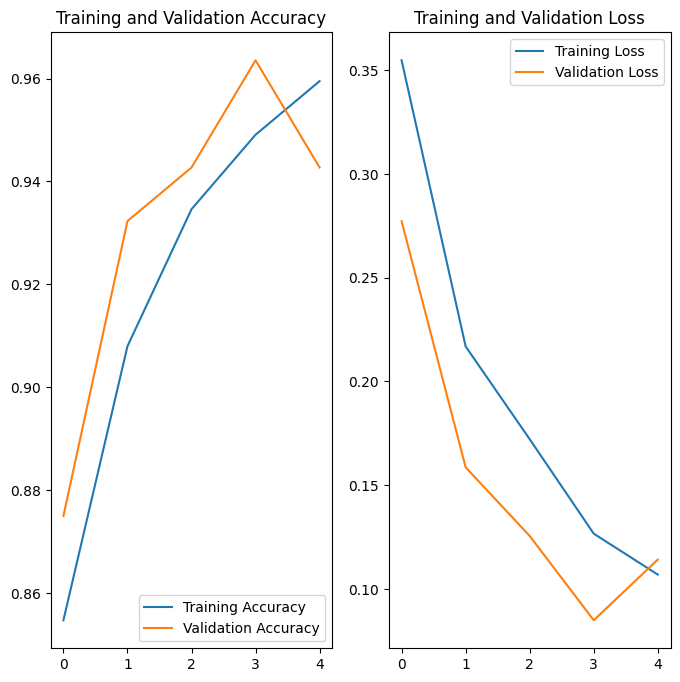

In [55]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
# plt.plot(range(EPOCHS), acc, label='Training Accuracy')
# plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.plot(range(5), acc, label='Training Accuracy')
plt.plot(range(5), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



plt.subplot(1, 2, 2)
plt.plot(range(5), loss, label='Training Loss')
plt.plot(range(5), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 2s 2s/step
predicted label: Potato___Late_blight


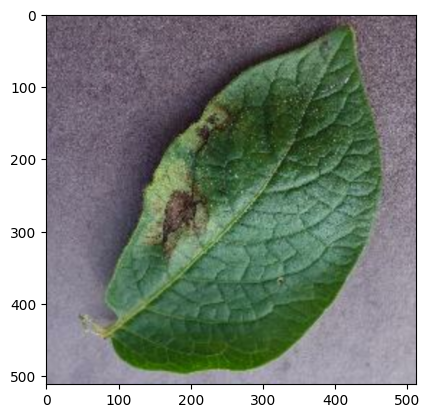

In [60]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [75]:
new_height = 512
new_width = 512
IMAGE_SIZE = tf.constant([new_height, new_width])


In [76]:
def predict(model, img):
    img_array = tf.image.resize(img, IMAGE_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 126ms/step


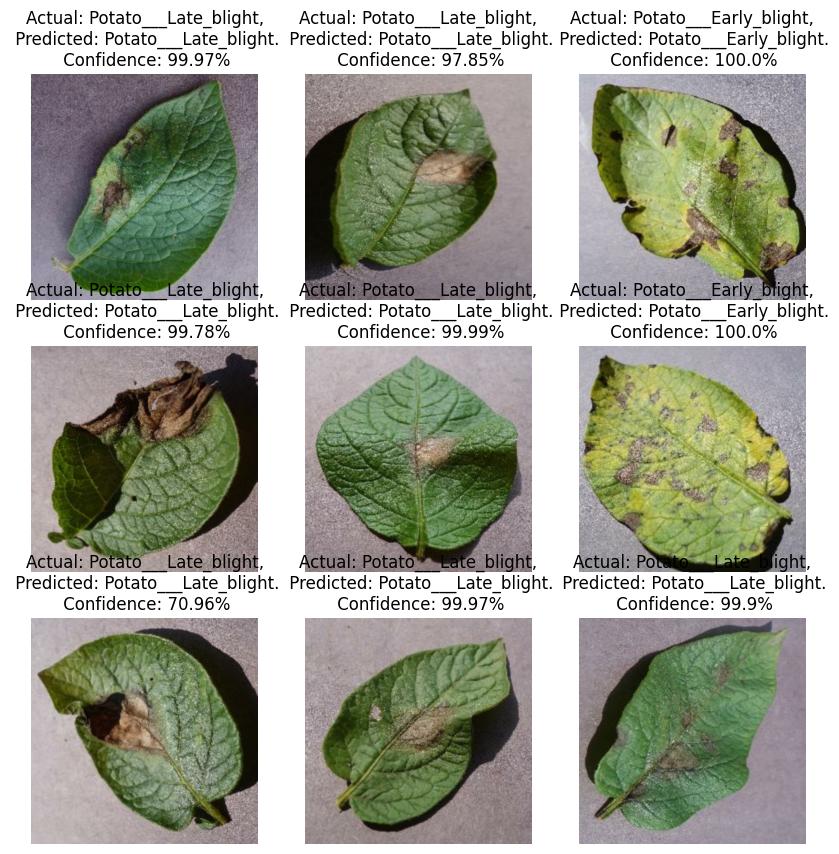

In [77]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1 )
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [78]:
import os
model_version=max([int(i) for i in os.listdir("../model") + [0]])+1
model.save(f"../model/{model_version}")

INFO:tensorflow:Assets written to: ../model/6\assets


INFO:tensorflow:Assets written to: ../model/6\assets


In [74]:
import os
print('Get current working directory : ', os.getcwd())

print('Absolute path of file:     ', 
      os.path.abspath("model"))
print('Absolute directoryname: ', 
      os.path.dirname(os.path.abspath("model")))

Get current working directory :  C:\ML\Potato-disease\Training
Absolute path of file:      C:\ML\Potato-disease\Training\model
Absolute directoryname:  C:\ML\Potato-disease\Training
